# Notebook for Data Exploration of Aachen dataset

In [157]:
import numpy as np
import pandas as pd
import mat4py as mpy

from Load_and_Preprocess_Aachen import preprocess_aachen_dataset

In [158]:
file_path = '/Users/sigurdgjerdingen/Student/Master kode/Master_Herstad-Gjerdingen/Aachen/Degradation_Prediction_Dataset_ISEA.mat'

In [159]:
# --- 1) Load and transform the raw data from .mat into a Pandas DataFrame ---
data_loader = mpy.loadmat(file_path)
df = pd.DataFrame.from_dict(data_loader["TDS"])

def compute_eol_and_rul80(row):
    """
    Compute EOL80 (End of Life where capacity drops below 80% of initial)
    and RUL80 (Remaining Useful Life at 80% capacity).
    """
    history_cap = np.array(row["History"])
    history_cycles = np.array(row["History_Cycle"])
    target_cap = np.array(row["Target_expanded"])
    target_cycles = np.array(row["Target_Cycle_Expanded"])

    eol80_cycle = np.nan
    rul80 = np.nan

    # Handle cases with missing data in historical capacity or cycles
    if len(history_cap) == 0 or len(history_cycles) == 0:
        return pd.Series({"EOL80": eol80_cycle, "RUL80": rul80})

    # Determine the threshold for EOL80
    initial_capacity = history_cap[0]
    threshold = 0.8 * initial_capacity

    # Check if the historical capacity already falls below the threshold
    if history_cap[-1] <= threshold:
        return pd.Series({"EOL80": np.nan, "RUL80": np.nan})

    # Handle cases with missing target data
    if len(target_cap) == 0 or len(target_cycles) == 0:
        return pd.Series({"EOL80": eol80_cycle, "RUL80": rul80})

    # Find the first cycle where capacity drops below the threshold in the target portion
    below_threshold_indices = np.where(target_cap < threshold)[0]
    if len(below_threshold_indices) > 0:
        eol80_index = below_threshold_indices[0]
        eol80_cycle = target_cycles[eol80_index]

    # Calculate RUL80 as the difference between EOL80 and the last history cycle
    if not pd.isna(eol80_cycle):
        last_history_cycle = history_cycles[-1]
        rul80 = eol80_cycle - last_history_cycle

    return pd.Series({"EOL80": eol80_cycle, "RUL80": rul80})

# Compute EOL80 and RUL80 for each row
# df[["EOL80", "RUL80"]] = df.apply(compute_eol_and_rul80, axis=1)

# Filter out rows with invalid RUL80 values (NaN, etc.)
# df_valid = df[df["RUL80"].notna()]

In [160]:
df_valid

,Cell,Sample,History_Cycle,History,Target_Cycle_Expanded,Target_expanded,Target_Cycle,Target,EOL80,RUL80
0,1,1,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[105, 110, 115, 120, 125, 130, 135, 140, 145, ...","[1.7973466099593307, 1.7957194104838883, 1.794...","[105, 150, 195, 240, 285, 330, 375, 420, 465, ...","[1.7973466099593307, 1.7832393947563925, 1.770...",1160.0,1060.0
1,1,2,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[110, 115, 120, 125, 130, 135, 140, 145, 150, ...","[1.7957194104838883, 1.794106179214274, 1.7925...","[110, 155, 200, 245, 290, 335, 380, 425, 470, ...","[1.7957194104838883, 1.7817527911332156, 1.769...",1160.0,1055.0
2,1,3,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[115, 120, 125, 130, 135, 140, 145, 150, 155, ...","[1.794106179214274, 1.7925073295393719, 1.7909...","[115, 160, 205, 250, 295, 340, 385, 430, 475, ...","[1.794106179214274, 1.7802836132202329, 1.7676...",1160.0,1050.0
3,1,4,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[120, 125, 130, 135, 140, 145, 150, 155, 160, ...","[1.7925073295393719, 1.7909232748480652, 1.789...","[120, 165, 210, 255, 300, 345, 390, 435, 480, ...","[1.7925073295393719, 1.7788295719024707, 1.766...",1160.0,1045.0
4,1,5,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[125, 130, 135, 140, 145, 150, 155, 160, 165, ...","[1.7909232748480652, 1.7893544285292378, 1.787...","[125, 170, 215, 260, 305, 350, 395, 440, 485, ...","[1.7909232748480652, 1.7773897124807985, 1.765...",1160.0,1040.0
...,...,...,...,...,...,...,...,...,...,...
10660,47,10661,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.84724471159825, 1.845306403634897, 1.843378...","[1090, 1095, 1100, 1105, 1110, 1115, 1120, 112...","[1.490657822471124, 1.4869719936046606, 1.4832...","[1090, 1135, 1180, 1225, 1270, 1315, 1360, 140...","[1.490657822471124, 1.4559932133045455, 1.4167...",1110.0,25.0
10661,47,10662,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.84724471159825, 1.845306403634897, 1.843378...","[1095, 1100, 1105, 1110, 1115, 1120, 1125, 113...","[1.4869719936046606, 1.4832618921167535, 1.479...","[1095, 1140, 1185, 1230, 1275, 1320, 1365, 141...","[1.4869719936046606, 1.4518588129722765, 1.412...",1110.0,20.0
10662,47,10663,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.84724471159825, 1.845306403634897, 1.843378...","[1100, 1105, 1110, 1115, 1120, 1125, 1130, 113...","[1.4832618921167535, 1.4795291195984899, 1.475...","[1100, 1145, 1190, 1235, 1280, 1325, 1370, 141...","[1.4832618921167535, 1.447666140786631, 1.4074...",1110.0,15.0
10663,47,10664,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.84724471159825, 1.845306403634897, 1.843378...","[1105, 1110, 1115, 1120, 1125, 1130, 1135, 114...","[1.4795291195984899, 1.4757613546910484, 1.471...","[1105, 1150, 1195, 1240, 1285, 1330, 1375, 142...","[1.4795291195984899, 1.4434160476754425, 1.402...",1110.0,10.0


In [161]:
# Fetch out the eol80 value for each distingt cell number
eol80_values = df_valid.groupby("Cell")["EOL80"].first()

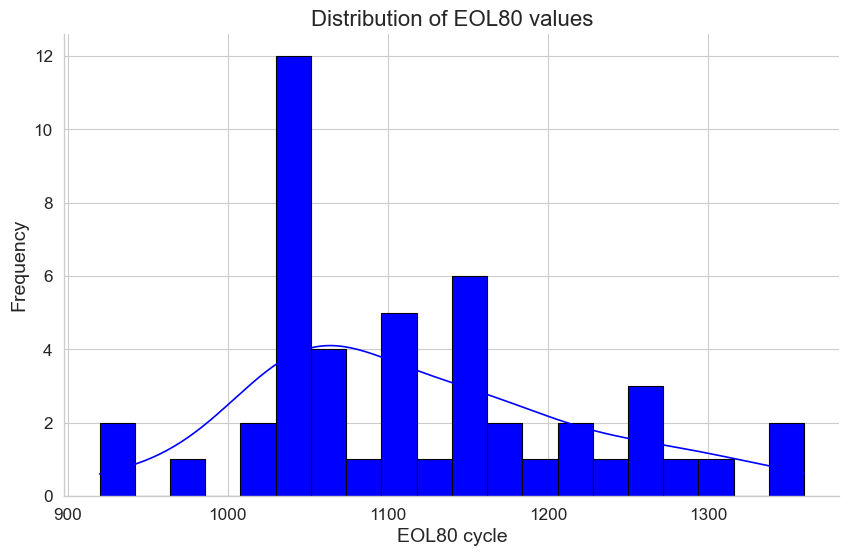

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the context and style for the plot
sns.set_context("paper", font_scale=1.4)
sns.set_style("whitegrid")

# Create a figure for the histogram
plt.figure(figsize=(10, 6))

# Plot the histogram with KDE
sns.histplot(eol80_values, bins=20, kde=True, color="blue", edgecolor="black",
             alpha=1)

# Set the labels and title
plt.xlabel("EOL80 cycle", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of EOL80 values", fontsize=16)

# Remove the top and right spines from the plot
sns.despine()

# Save the figure
plt.savefig("EOL80_histogram.eps", format="eps", bbox_inches="tight", dpi=300)

# Show the plot
plt.show()

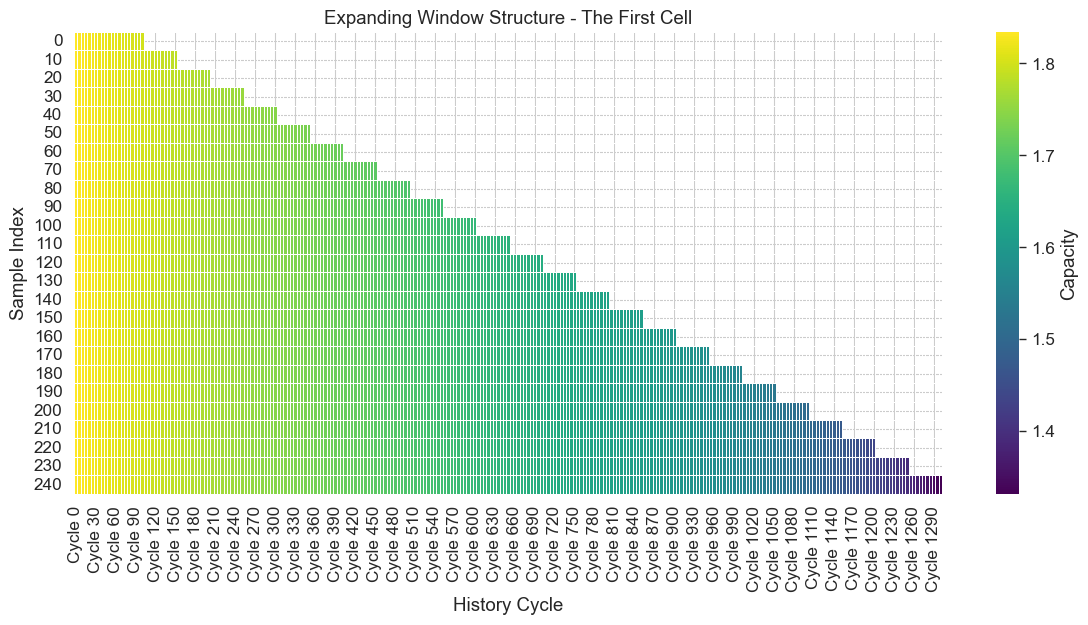

In [167]:
## Every 10 row for the first cell

# Extract all rows referring to the first cell
df_cell1 = df[df["Cell"] == 1]

# 10th sample
df_cell1 = df_cell1[::10]

# Extract unique history cycles from the dataframe
history_cycles = sorted(set(cycle for sublist in df_cell1["History_Cycle"] for cycle in sublist))

# Initialize the expanding matrix with
expanding_matrix_seaborn = np.full((len(df_cell1), len(history_cycles)), np.nan)

# Filling in the matrix with 1s where history cycles exist
for i, (history, values) in enumerate(zip(df_cell1["History_Cycle"], df_cell1["History"])):
    indices = [history_cycles.index(cycle) for cycle in history]
    expanding_matrix_seaborn[i, indices] = values

# Convert to DataFrame for visualization
expanding_df_seaborn = pd.DataFrame(
    expanding_matrix_seaborn,
    index=df_cell1.index,
    columns=[f"Cycle {cycle}" for cycle in history_cycles]
)

# Plot heatmap using Seaborn
plt.figure(figsize=(14, 6))
sns.heatmap(expanding_df_seaborn, cmap="viridis", linewidths=0.5, 
            cbar_kws={"label": "Capacity"})

plt.xlabel("History Cycle")
plt.ylabel("Sample Index")
plt.title("Expanding Window Structure - The First Cell")

# Display plot
plt.show()


In [168]:
# Every 10th row for the first 3 cells

# Extract all rows referring to the first 3 cells
df_cells_1_3 = df[df["Cell"].isin([1, 2, 3])]

df_cells_1_3.shape

df_cells_1_3

,Cell,Sample,History_Cycle,History,Target_Cycle_Expanded,Target_expanded,Target_Cycle,Target
0,1,1,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[105, 110, 115, 120, 125, 130, 135, 140, 145, ...","[1.7973466099593307, 1.7957194104838883, 1.794...","[105, 150, 195, 240, 285, 330, 375, 420, 465, ...","[1.7973466099593307, 1.7832393947563925, 1.770..."
1,1,2,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[110, 115, 120, 125, 130, 135, 140, 145, 150, ...","[1.7957194104838883, 1.794106179214274, 1.7925...","[110, 155, 200, 245, 290, 335, 380, 425, 470, ...","[1.7957194104838883, 1.7817527911332156, 1.769..."
2,1,3,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[115, 120, 125, 130, 135, 140, 145, 150, 155, ...","[1.794106179214274, 1.7925073295393719, 1.7909...","[115, 160, 205, 250, 295, 340, 385, 430, 475, ...","[1.794106179214274, 1.7802836132202329, 1.7676..."
3,1,4,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[120, 125, 130, 135, 140, 145, 150, 155, 160, ...","[1.7925073295393719, 1.7909232748480652, 1.789...","[120, 165, 210, 255, 300, 345, 390, 435, 480, ...","[1.7925073295393719, 1.7788295719024707, 1.766..."
4,1,5,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[125, 130, 135, 140, 145, 150, 155, 160, 165, ...","[1.7909232748480652, 1.7893544285292378, 1.787...","[125, 170, 215, 260, 305, 350, 395, 440, 485, ...","[1.7909232748480652, 1.7773897124807985, 1.765..."
...,...,...,...,...,...,...,...,...
683,3,684,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.840036111156223, 1.8372405290428224, 1.8344...","[1160, 1165, 1170, 1175, 1180, 1185, 1190, 119...","[1.3787848309155957, 1.3725568191851223, 1.366...","[1160, 1205, 1250, 1295, 1340, 1385, 1430, 147...","[1.3787848309155957, 1.3190293825982502, 1.256..."
684,3,685,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.840036111156223, 1.8372405290428224, 1.8344...","[1165, 1170, 1175, 1180, 1185, 1190, 1195, 120...","[1.3725568191851223, 1.3661965335902326, 1.359...","[1165, 1210, 1255, 1300, 1345, 1390, 1435, 148...","[1.3725568191851223, 1.3120645559634159, 1.250..."
685,3,686,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.840036111156223, 1.8372405290428224, 1.8344...","[1170, 1175, 1180, 1185, 1190, 1195, 1200, 120...","[1.3661965335902326, 1.3597165755163543, 1.353...","[1170, 1215, 1260, 1305, 1350, 1395, 1440, 148...","[1.3661965335902326, 1.3050808679330113, 1.243..."
686,3,687,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.840036111156223, 1.8372405290428224, 1.8344...","[1175, 1180, 1185, 1190, 1195, 1200, 1205, 121...","[1.3597165755163543, 1.3531295463489144, 1.346...","[1175, 1220, 1265, 1310, 1355, 1400, 1445, 149...","[1.3597165755163543, 1.298090919892464, 1.2369..."


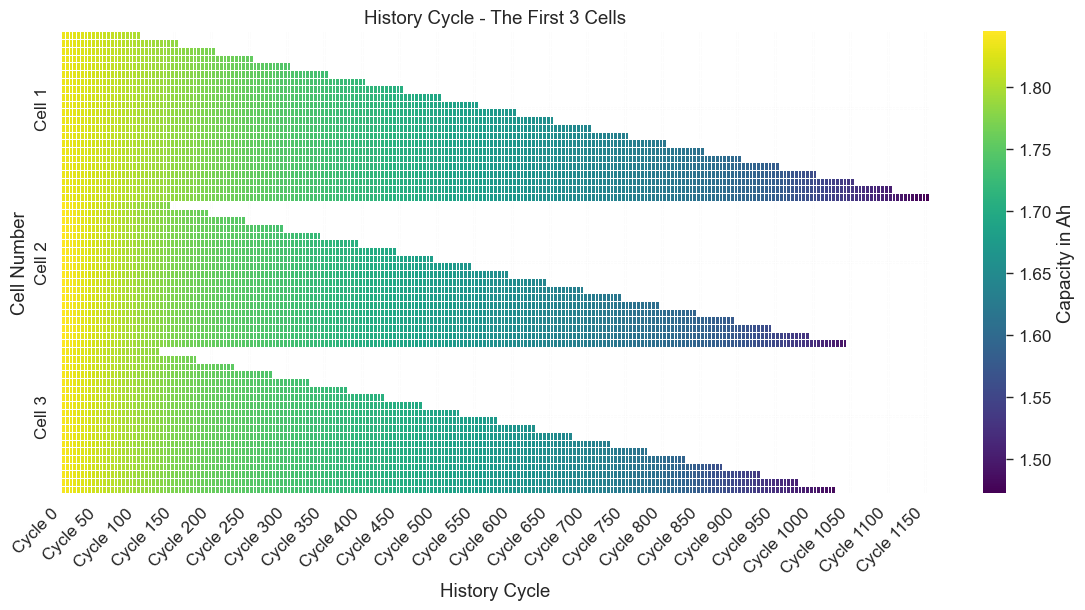

In [180]:
# Every 10th row for the first 3 cells

# Extract all rows referring to the first 3 cells
df_cells_1_3 = df_valid[df_valid["Cell"].isin([1, 2, 3])]

# 10th sample
df_cells_1_3 = df_cells_1_3[::10]

# Extract unique history cycles from the dataframe
history_cycles = sorted(set(cycle for sublist in df_cells_1_3["History_Cycle"] for cycle in sublist))

# Initialize the expanding matrix with
expanding_matrix_seaborn = np.full((len(df_cells_1_3), len(history_cycles)), np.nan)

# Filling in the matrix with 1s where history cycles exist
for i, (history, values) in enumerate(zip(df_cells_1_3["History_Cycle"], df_cells_1_3["History"])):
    indices = [history_cycles.index(cycle) for cycle in history]
    expanding_matrix_seaborn[i, indices] = values

# Convert to DataFrame for visualization
expanding_df_seaborn = pd.DataFrame(
    expanding_matrix_seaborn,
    index=df_cells_1_3["Cell"],
    columns=[f"Cycle {cycle}" for cycle in history_cycles]
)

cycle_interval = 10  # Use every 5th instance

# Select the cycles to display as labels (every 5th or the last one)
cycle_ticks = [history_cycles[i] for i in range(0, len(history_cycles), cycle_interval)]
if history_cycles[-1] not in cycle_ticks: # Add last cycle if not already included
    cycle_ticks.append(history_cycles[-1])

cycle_labels = [f"Cycle {cycle}" for cycle in cycle_ticks]

# Set up the figure size
plt.figure(figsize=(14, 6))

# Create a mask to hide NaN values
mask = np.isnan(expanding_df_seaborn)

# Plot heatmap using Seaborn
sns.heatmap(expanding_df_seaborn, cmap="viridis", mask=mask, linewidths=0.5, 
            cbar_kws={"label": "Capacity in Ah"})

# Labels and title
plt.yticks(ticks=[10, 30, 50], labels=["Cell 1", "Cell 2", "Cell 3"])
plt.xticks(np.arange(0, len(history_cycles), cycle_interval), cycle_labels, rotation=45, ha="right")
plt.xlabel("History Cycle")
plt.ylabel("Cell Number")
plt.title("History Cycle - The First 3 Cells")

# Save the plot
plt.savefig("plot/Expanding_Window_Structure.eps", format="eps", bbox_inches="tight", dpi=300)


# Show plot
plt.show()